# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [25]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.sort_values('net_bill', inplace=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.483092,2.07
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381,2.10
92,5.75,1.00,Female,Yes,Fri,Dinner,2,0.210526,4.75
149,7.51,2.00,Male,No,Thur,Lunch,2,0.362976,5.51
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286,5.60


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.31e-12
Time:                        22:38:28   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.0

(0.0, 0.505398619388979)

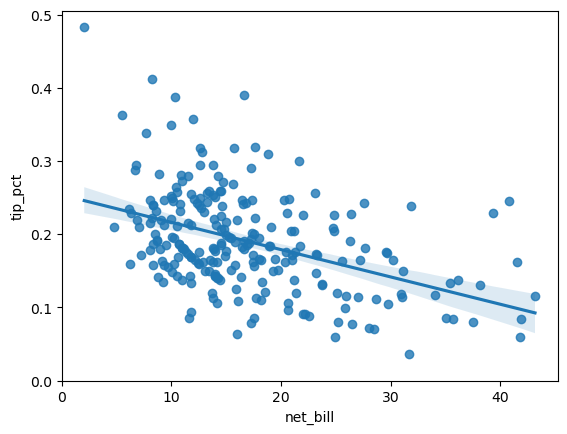

In [9]:
reg = smf.ols('tip_pct ~ net_bill', data = tips[tips['tip_pct']<.5]).fit()
print(reg.summary())

# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.03e-14
Time:                        22:51:06   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

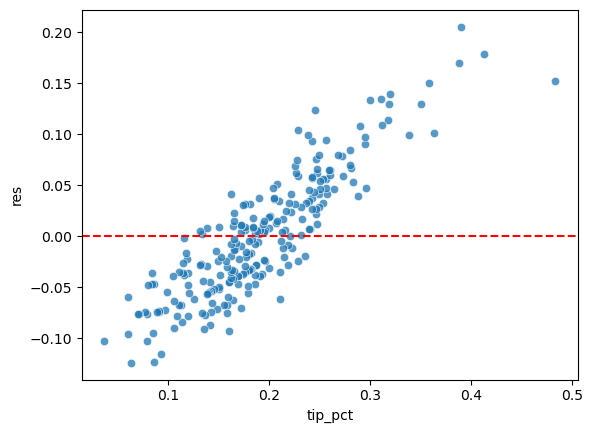

In [26]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips[tips['tip_pct']<.5]).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y = 'res', data = tips[tips['tip_pct']<.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

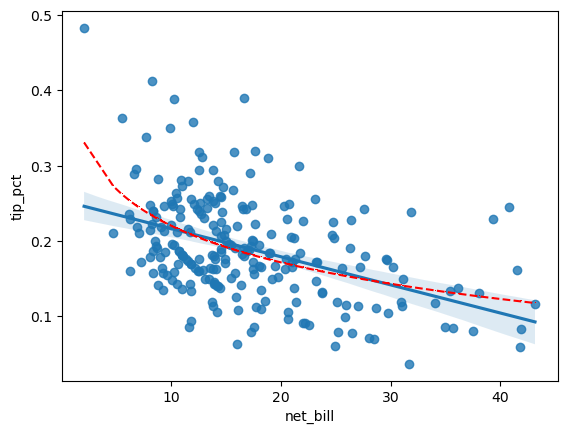

In [27]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct']<.5])
plt.plot(tips[tips['tip_pct']<.5]['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.09e-12
Time:                        22:51:16   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

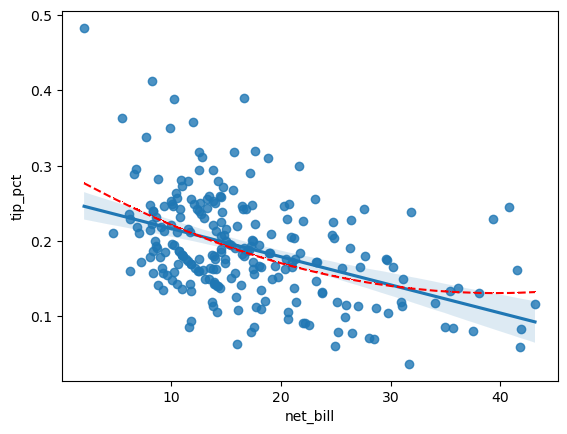

In [28]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips[tips['tip_pct']<.5]).fit()
print(reg.summary())

sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct']<.5])
plt.plot(tips[tips['tip_pct']<.5]['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.70e-15
Time:                        22:54:49   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

0.18946394629203078

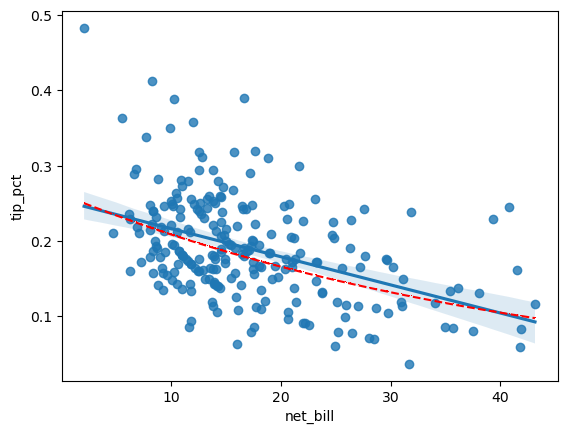

In [37]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips[tips['tip_pct']<.5]).fit()
print(reg.summary())

sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct']<.5])
plt.plot(tips[tips['tip_pct']<.5]['net_bill'], np.exp(reg.fittedvalues), 'r,--')

tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0,1]
r**2

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           2.65e-15
Time:                        22:54:34   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

0.22104786698842344

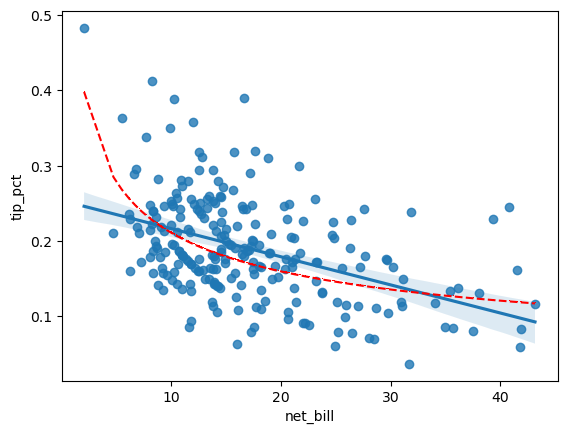

In [36]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips[tips['tip_pct']<.5]).fit()
print(reg.summary())

sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct']<.5])
plt.plot(tips[tips['tip_pct']<.5]['net_bill'], np.exp(reg.fittedvalues), 'r,--')

tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0,1]
r**2

###  6. qual modelo resultou no melhor ajuste?

O Modelo 5, resultou no maior valor de R²